# Project 3: EDA and Data Cleaning

# Problem Statement

## Is it clear what the goal of the project is?

Subreddits are used by millions of users with discussions on topics in specific thread. Discussions, questions and comments are found in each thread which resulted in a treasure cove of information. 

This project has identified two different subreddits for analysis namely Machine Learning and Statistics. This analysis aims to understand the patterns within each subreddit. Comparison will be done between the two threads to see if there are any correlations between the topic.

The subreddit links are as follows:
- Machine Learning: https://www.reddit.com/r/MachineLearning/
- Statistics: https://www.reddit.com/r/statistics/

## What type of model will be developed?

The data will be explored with the following models:
- Logistic Regression
- Random Forest

## How will success be evaluated?

Success will be evaluated based on the results from the model. It is dependent on further findings based on trend analysis.

## Is the scope of the project appropriate?

The scope of the project will be based on the information retrieved on each subreddit using the Prawl api for the threads Statistics and Machine Learning respectively.

Each subreddit will have around approximately around 1000 lines of new posts such as questions or discussions. ~1000 lines of data has to be found to be the maximum number of posts that are allowed to be prawled from the data.

For each post, information that have been assessed to be useful such as title, post details and comment have been prawled and exported to a csv file for further analysis.

## Is it clear who cares about this or why this is important to investigate?

This is important to be investigated as both Machine Learning and Statistics are closely related topics. Statistics is also considered a prerequisite to Machine Learning. 

Reference:
https://machinelearningmastery.com/what-is-statistics/

## Does the student consider the audience and the primary and secondary stakeholders?

The primary stakeholders would be people who are interested in understanding the correlation between Statistics and Machine Learning such as aspiring Data Scientists who are interested to pick up the concepts. The seconday stakeholders could be aspiring statisticians who are interested to understand in what way does machine learning correlates with statistic.

# Data Cleaning and EDA

## Dataset Overview

The following datasets will be used for the purpose of this analysis.
1. machine_learning_df.csv
- This dataset contains information that has been prawled from the Machine Learning subreddit.
2. statistics_df.csv
- This dataset contains information that has been prawled from the Statistics subreddit.

## Import Libraries

In [55]:
'''Import libraries for data analysis'''
import pandas as pd
import matplotlib.pyplot as plt

'''import libraries for text processing'''
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords # import stopwords as baseline for words removal
from nltk.stem import WordNetLemmatizer

## Custom Function

In [56]:
'''Function prints out shape, first 5 rows, last 5 rows of dataframe'''
def print_df_info(dataset):
    print('dataframe shape: ', dataset.shape)
    print('first 5 rows: ', dataset.head(2))
    print('last 5 rows:',dataset.tail(2))
    
'''Function to show only columns in null value for dataframe '''
def show_df_null(dataframe):
    null_count_train_df = dataframe.isnull().sum() #create df with count of null
    print(null_count_train_df[null_count_train_df>0]) # filter out column where count of null > 0

## Load Datasets

In [57]:
'''Load Machine Learning Subreddit Data'''
machine_learning_df = pd.read_csv('../datasets/machine_learning_df.csv')

'''Load Statistics Subreddit Data'''
statistics_df = pd.read_csv('../datasets/statistics_df.csv')

In [58]:
'''Print Machine Learning Dataset Overview'''
print('Machine Learning Subreddit:\n')
print_df_info(machine_learning_df)
print('-'*50)
print('Statistics Subreddit:\n')
print_df_info(statistics_df)
print('-'*50)

Machine Learning Subreddit:

dataframe shape:  (980, 8)
first 5 rows:                                                 title  \
0       [N] HuggingFace Model Size: Chrome Extension   
1  exploring deep NN activation visualization. [D...   

                                            sub_text       id        author  \
0  We've built a chrome extension that shows you ...  13wosgs  dhruvanand93   
1  I would like to be able to visualize/ understa...  13wocwz    FachoFacho   

    created_utc  score  upvote_ratio  \
0  1.685546e+09      2           1.0   
1  1.685545e+09      1           1.0   

                                       comments_list  
0                                                 []  
1  ['It depends what youre asking for. If you wan...  
last 5 rows:                                                  title  \
978  [D] Are there no repercussions for breaking du...   
979         [D] 1 in 1M false positive for an ML model   

                                              su

## Data Cleaning

### Convert from UTC to datetime

In [59]:
'''convert created_utc to datetime for statistics_df'''
statistics_df['datetime'] = pd.to_datetime(statistics_df['created_utc'], unit='s', utc=True)

'''extract date and year for statistics_df'''
statistics_df['year'] = statistics_df['datetime'].dt.year
statistics_df['month'] = statistics_df['datetime'].dt.month

'''drop column created_utc for statistics'''
statistics_df = statistics_df.drop(['created_utc'], axis=1)

'''convert created_utc to datetime for machine_learning_df'''
machine_learning_df['datetime'] = pd.to_datetime(machine_learning_df['created_utc'], unit='s', utc=True)

'''extract date and year for machine_learning_df'''
machine_learning_df['year'] = machine_learning_df['datetime'].dt.year
machine_learning_df['month'] = machine_learning_df['datetime'].dt.month

'''drop column created_utc for machine_learning_df'''
machine_learning_df = machine_learning_df.drop(['created_utc'], axis=1)



### Check for missing value

In [60]:
'''check for missing values in statistics_df'''
print('Statistics_df:')
show_df_null(statistics_df)
print('-'*50)

'''check for missing values in statistics_df'''
print('Machine_Learning_df:')
show_df_null(machine_learning_df)
print('-'*50)

Statistics_df:
sub_text    29
author       2
dtype: int64
--------------------------------------------------
Machine_Learning_df:
sub_text    126
author        2
dtype: int64
--------------------------------------------------


### Check for info view

In [61]:
'''Check info for statistics_df'''
statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   title          997 non-null    object             
 1   sub_text       968 non-null    object             
 2   id             997 non-null    object             
 3   author         995 non-null    object             
 4   score          997 non-null    int64              
 5   upvote_ratio   997 non-null    float64            
 6   comments_list  997 non-null    object             
 7   datetime       997 non-null    datetime64[ns, UTC]
 8   year           997 non-null    int64              
 9   month          997 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 78.0+ KB


In [62]:
'''Check info for statistics_df'''
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   title          980 non-null    object             
 1   sub_text       854 non-null    object             
 2   id             980 non-null    object             
 3   author         978 non-null    object             
 4   score          980 non-null    int64              
 5   upvote_ratio   980 non-null    float64            
 6   comments_list  980 non-null    object             
 7   datetime       980 non-null    datetime64[ns, UTC]
 8   year           980 non-null    int64              
 9   month          980 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 76.7+ KB


### Combined "title", "sub_text" and "comments_list" to one column

Observed that sub_text for machine learning is relatively high for 126 out of 980 records at 12.86%. 

Hence the decision is made not to drop the rows with missing values as the percentage is too significant. Taking into account it is possible to only have a post with only title as it could be self explanatory without the need for additional sub_text.

For the purpose of this analysis, titles, sub_text and comment_list will be combined for the analysis as the  objective is to find out
is the overall trend of each discussion as a whole for each post.

In [63]:
'''create joined column for joined data for statistics_df'''
statistics_df['joined_data'] = statistics_df['title'].astype(str) + statistics_df['sub_text'].astype(str) +statistics_df['comments_list'].astype(str)
# astype9str) added to convert empty space to string to enable joining.

'''create joined column for joined data for machine_learning_df'''
machine_learning_df['joined_data'] = machine_learning_df['title'].astype(str) + machine_learning_df['sub_text'].astype(str) +machine_learning_df['comments_list'].astype(str)

In [66]:
'''view the top 5 row of the dataset for statistics'''
print('statistics df top 3 rows')
statistics_df.head(3)

statistics df top 3 rows


,title,sub_text,id,author,score,upvote_ratio,comments_list,datetime,year,month,joined_data
0,[Question] Please help me figure out this simp...,I cannot figure out how to find this through g...,13wyhnk,earlysong,8,0.90,['This is known as the coupon collector proble...,2023-05-31 21:22:03+00:00,2023,5,[Question] Please help me figure out this simp...
1,[Q] In what sense is a variance a mean?,In what sense is a variance a mean?\n\n&#x200B...,13wx1s5,SGS0108,0,0.25,['Compare the formulas for sample mean and sam...,2023-05-31 20:27:53+00:00,2023,5,[Q] In what sense is a variance a mean?In what...
2,[Q] How to calculate the likelihood with param...,I'm stuck in this for some time. I have a time...,13wubs6,RopsXuh,1,1.00,"[""The poisson has one parameter and you model ...",2023-05-31 18:41:48+00:00,2023,5,[Q] How to calculate the likelihood with param...


In [67]:
'''view the top 5 row of the dataset for machine learning df'''
print('machine learning df top 3 rows')
machine_learning_df.head(3)

machine learning df top 3 rows


,title,sub_text,id,author,score,upvote_ratio,comments_list,datetime,year,month,joined_data
0,[N] HuggingFace Model Size: Chrome Extension,We've built a chrome extension that shows you ...,13wosgs,dhruvanand93,2,1.0,[],2023-05-31 15:07:31+00:00,2023,5,[N] HuggingFace Model Size: Chrome ExtensionWe...
1,exploring deep NN activation visualization. [D...,I would like to be able to visualize/ understa...,13wocwz,FachoFacho,1,1.0,['It depends what youre asking for. If you wan...,2023-05-31 14:51:20+00:00,2023,5,exploring deep NN activation visualization. [D...
2,"[R] Astronomia ex machina: a history, primer a...",[https://doi.org/10.1098/rsos.221454](https://...,13wnleh,Smith4242,2,1.0,[],2023-05-31 14:19:56+00:00,2023,5,"[R] Astronomia ex machina: a history, primer a..."


### Check upvote_ratio and score

In [68]:
'''view unique upvote count for statistic_df upvote ratio'''
'''show top 20 rows'''
pd.set_option("display.max_rows", None)
statistics_df['upvote_ratio'].value_counts().sort_values(ascending = False).head(20)


1.00    379
0.67     61
0.50     60
0.75     38
0.92     25
0.33     22
0.94     21
0.87     20
0.86     19
0.93     18
0.91     18
0.84     18
0.60     17
0.97     16
0.81     15
0.90     15
0.95     15
0.80     14
0.96     11
0.88     11
Name: upvote_ratio, dtype: int64

In [166]:
'''view unique upvote count for machine_learning_df upvote ratio'''
'''show top 20 rows'''
pd.set_option("display.max_rows", None)
machine_learning_df['upvote_ratio'].value_counts().sort_values(ascending = False).head(20)

1.00    98
0.86    36
0.88    36
0.50    34
0.90    33
0.95    32
0.67    32
0.96    29
0.92    27
0.97    25
0.89    25
0.80    25
0.83    25
0.75    25
0.85    24
0.93    22
0.91    21
0.94    21
0.87    20
0.81    18
Name: upvote_ratio, dtype: int64

Upvote_ratio:
- On the high level it appears that the statistics subreddit has more posts with a higher scoring of upvote_ratio compared to the machine learning subreddit. However this may not necessarily be true as it could also be due to a lower rate of upvote activity on the particular post. For example, if the post only has 1 upvote, the upvote ratio would be been 1.0.

In [69]:
'''show unique score for statistic_df'''
'''view top 20 values'''
statistics_df['score'].value_counts().sort_values(ascending = False).head(20)

1     221
2     137
0     132
3      94
4      41
5      36
7      32
6      31
8      21
9      21
10     21
12     18
15     15
13     15
11     13
16     11
19      7
14      6
25      6
33      6
Name: score, dtype: int64

In [165]:
'''show unique score for machine_learning_df'''
'''view top 20 values'''
machine_learning_df['score'].value_counts().sort_values(ascending = False).head(20)

0     177
3      63
1      57
2      55
4      43
6      34
10     26
5      25
8      25
9      23
11     19
7      19
13     17
12     16
21     14
20     11
15     11
36      8
17      8
14      8
Name: score, dtype: int64

score:
- On the high level, it appears that that are more upvote activity for the statistics subreddit, it is observed that the machine learning subreddit has 177 posts with a score of 0.
- It is interesting to observed that machine learning subreddit has posts with higher score such as 11 with 19 upvotes.
- Currently there is no clear pattern to the trend of the score.

### Analyse Posts by Time

In [70]:
'''check the unique value in column year for statistics_df'''
print('statistics year value count:')
print(statistics_df['year'].value_counts())
print('-'*20)

'''check the unique value in column month for statistics_df'''
print('statistics month value count:')
print(statistics_df['month'].value_counts())
print('-'*20)

'''check the unique value in column year for machine_learning_df'''
print('machine learning year value count:')
print(machine_learning_df['year'].value_counts())
print('-'*20)

'''check the unique value in column month for machine_learning_df'''
print('machine learning month value count:')
print(machine_learning_df['month'].value_counts())
print('-'*20)


statistics year value count:
2023    997
Name: year, dtype: int64
--------------------
statistics month value count:
3    318
4    305
5    304
2     70
Name: month, dtype: int64
--------------------
machine learning year value count:
2023    980
Name: year, dtype: int64
--------------------
machine learning month value count:
5    576
4    404
Name: month, dtype: int64
--------------------


Observed that both statistics and machine learning only have data from year 2023. Visualisation will be done across the number of post per month to better understand the trend of the activity across the two subreddit.

In [71]:
'''group statistics post count by month'''
statistics_grouped_month = statistics_df.groupby('month').size()

'''group machine learning post count by month '''
machine_learning_grouped_month = machine_learning_df.groupby('month').size()

In [72]:
machine_learning_grouped_month

month
4    404
5    576
dtype: int64

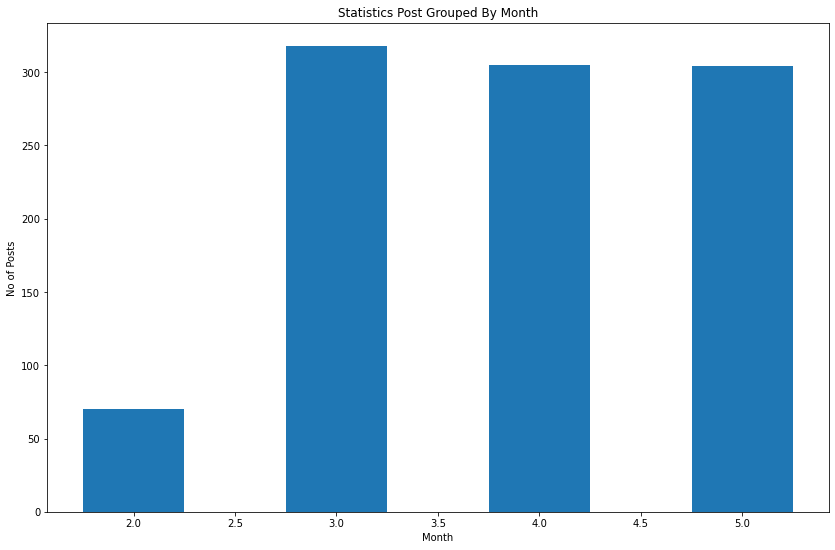

In [73]:
'''plot trend of number of statistics posts across the month'''
# Established the figure size
plt.figure(figsize=(14,9))

# Plot the grouped data
plt.bar(statistics_grouped_month.index, statistics_grouped_month.values, width=0.5)
plt.xlabel('Month')
plt.ylabel('No of Posts')
plt.title('Statistics Post Grouped By Month')
plt.show()

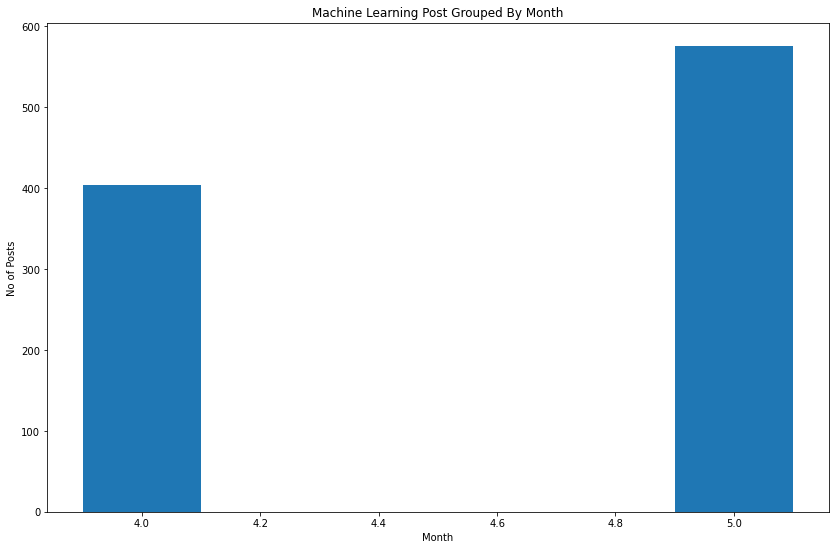

In [74]:
'''plot trend of number of machine learning posts across the month'''
# Established the figure size
plt.figure(figsize=(14,9))

# Plot the grouped data
plt.bar(machine_learning_grouped_month.index, machine_learning_grouped_month.values,width=0.2)
plt.xlabel('Month')
plt.ylabel('No of Posts')
plt.title('Machine Learning Post Grouped By Month')
plt.show()

It is seen that around 1000 posts, posts from statistics subreddit spans from February 2023 to May 2023, a period of 4 months. Posts from machine learning subreddit for around 1000 posts spans from April 2023 to May 2023, a period of 2 months. For this period of data, it can be seen that machine learning as a subreddit is has more posts than statistics subreddit. It is twice as active compared to the statistic subreddit. 

### Tokenise words in joined_column and preprocess data

In [84]:
'''function retrieve and tokenize word, converts words to lower case, followed by lemmatisation and removal of stop words'''
def tokenize_words(text_info):
    #print(text_info)
    '''extract words from text to be tokenised'''
    tokenizer = RegexpTokenizer(r'\w+')
    '''tokenize sample text and convert it to lowercase'''
    extracted_tokens = tokenizer.tokenize(text_info.lower())
    '''instantiate lemmatiser'''
    lemmatizer = WordNetLemmatizer()
    '''lemmatise tokens'''
    extracted_tokens_lem = [lemmatizer.lemmatize(i) for i in extracted_tokens]
    '''remove stopwords'''
    extracted_tokens_lem_no_stopwords = [token for token in extracted_tokens_lem if token not in stopwords.words('english')]
    
    #print('-'*50)
    return extracted_tokens_lem_no_stopwords

### Explore and analyze join_data in statistics_df

In [117]:
'''extract join_comments and tokenise it for statistics_df'''
statistics_df['tokenize_join_comments'] = statistics_df['joined_data'].apply(tokenize_words).apply(' '.join)

C:\R\Installer\20221005_Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Words')

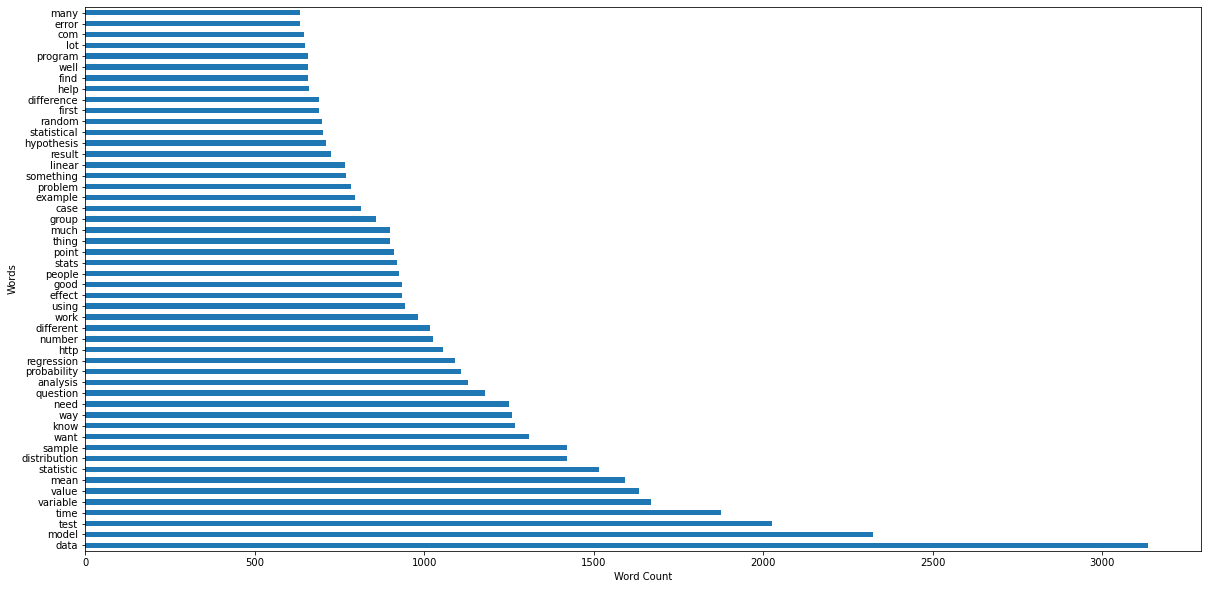

In [145]:
'''Plot and explore words for joined_data in statistics_df'''
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a CountVectorizer with the default hyperparameters.
custom_stop_words_stats = ['would','like','get','say','doe','one','use','see','wa','two','make','ha','also'
                           ,'think','really','even','look','might','could']
cvec = CountVectorizer(stop_words = custom_stop_words_stats)

# Fit and transform the words from statistics joined_data
statistics_joined_tokens_df = statistics_df['tokenize_join_comments']
cvec.fit(statistics_joined_tokens_df)
cv_trans_statistic = cvec.transform(statistics_joined_tokens_df)

cvec.get_feature_names()[1000:1010]
# convert training data to dataframe
cv_trans_statistic_df = pd.DataFrame(cv_trans_statistic.todense(), columns=cvec.get_feature_names())

# # plot top occuring words
cv_trans_statistic_df.sum().sort_values(ascending=False).head(50).plot(kind='barh',figsize=(20,10));
plt.xlabel('Word Count')
plt.ylabel('Words')

### Explore and analyze join_data in statistics_df

In [123]:
'''extract join_comments and tokenise it for machine_learning_df'''
machine_learning_df['tokenize_join_comments'] = machine_learning_df['joined_data'].apply(tokenize_words).apply(' '.join)

C:\R\Installer\20221005_Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Words')

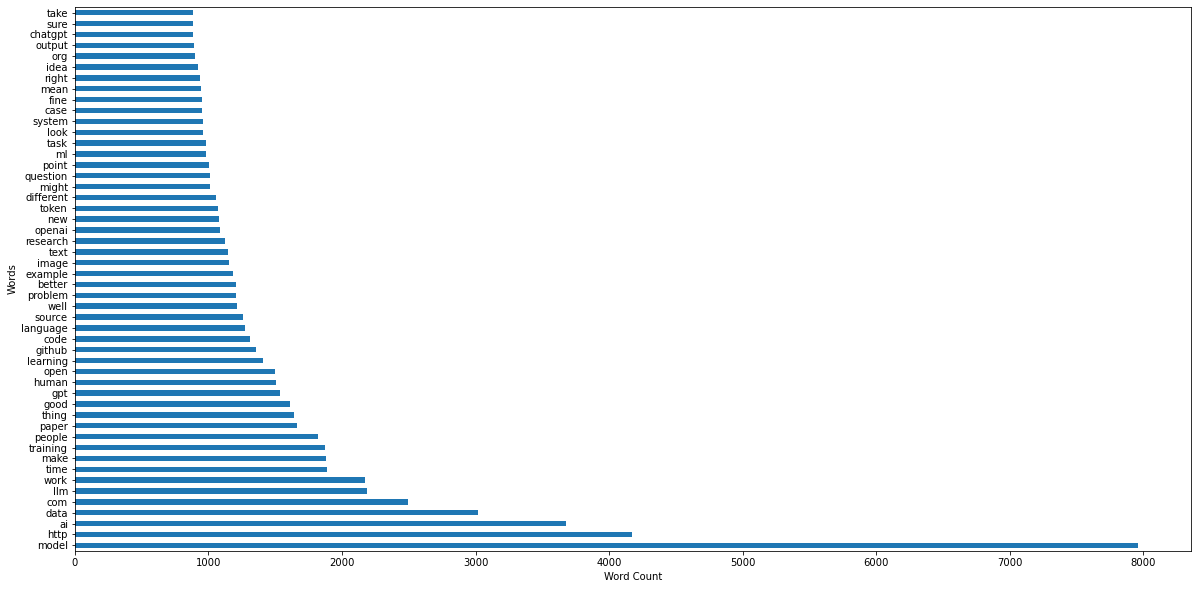

In [149]:
'''Plot and explore words for joined_data in machine learning df'''
# Instantiate a CountVectorizer with the default hyperparameters.
custom_stop_words_ml = ['also','could','get','know','much','want','doe','ha','use','would'
                        ,'wa','think','want','like','even','ni','really','see','lot','way'
                        ,'using','think','one','something','many','used','say','need'
                        ,'actually','still']
cvec = CountVectorizer(stop_words = custom_stop_words_ml) 

# Fit and transform the words from statistics joined_data
ml_joined_tokens_df = machine_learning_df['tokenize_join_comments']
cvec.fit(ml_joined_tokens_df)
cv_trans_ml = cvec.transform(ml_joined_tokens_df)

# convert training data to dataframe
cv_trans_ml_df = pd.DataFrame(cv_trans_ml.todense(), columns=cvec.get_feature_names())

# plot top occuring words
cv_trans_ml_df.sum().sort_values(ascending=False).head(50).plot(kind='barh',figsize=(20,10));
plt.xlabel('Word Count')
plt.ylabel('Words')

The column 'joined_comments' tokenised for both statistics_df and machine_learning_df. Count Vectoriser was than applied to data to analyse what are the the top 50 words for the respective subreddit. The following observations can be seen.

Analysis of words used:
- 'data' and 'model'are words which are commently used both subreddit. The machine learning subreddit has a higher count where both words are discussed.
    - 'model': this is the most commonly used word within the community. This indicates that there is a key interest in the topic of modelling for machine learning.
    - 'data': this is the most commonly used word within the community. This indicates that the key focus of the statistics discussion thread involves queries about dataset.
- 'http' is a common term that is used within both subreddit. Within the machine learning community, 'http' is used more common at more that 4000 count compared to around 1000 plus counts. This observation indicates that the machine learning community is more likely to share websites on http references compared to thes statistics community.

Unique observations on the statistics community subreddit:
- Commonly used terms within the community are statistical terms such as 'mean','variable', 'statistics, 'hypothesis', 'linear'. This indicates that the discussion within the statistics community seems to be focused on statistical method. Potentially the discussion could be on how certain statistical method is related or can be used in 'mode' given that 'model' is a commonly used word.

Unique observations on the machine learning community subreddit:
- words such as 'github' and 'code' indicates that the machine learning community potentially does more coding that than the statistics community.
- words such as 'chatgpt', 'gpt','openai', 'a' indicates that artificial intelligence is a topic of interest within the community itself.


# Concat Statistics and Machine Learning Data

## Review data in statistics and machine learning before concatenating

In [163]:
'''Print Information on Statistics'''
print('Statistics Info: ')
print(statistics_df.info())
print('-'*50)

'''Print Information on Machine Learning'''
print('Machine Learning Info: ')
print(machine_learning_df.info())
print('-'*50)

Statistics Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   title                   997 non-null    object             
 1   sub_text                968 non-null    object             
 2   id                      997 non-null    object             
 3   author                  995 non-null    object             
 4   score                   997 non-null    int64              
 5   upvote_ratio            997 non-null    float64            
 6   comments_list           997 non-null    object             
 7   datetime                997 non-null    datetime64[ns, UTC]
 8   year                    997 non-null    int64              
 9   month                   997 non-null    int64              
 10  joined_data             997 non-null    object             
 11  tokenize_join_comments  997

It is observed that sub_text and author has missing values. For the purpose of the analysis, the decision is made to retain the rows as the key focus for the analysis would be based on 'joined_data' and 'tokenize_join_comments' to predict whether the entry is from machine learning or statistics subreddit. 

## Concat statistics and machine learning data frame

Next, modelling will be done the dataset for statistics and machine learning data. A new column 'is_ml' will be added to identify the whether the dataset is machine learning or statistics. Dataset from machine learning subreddit will be given a value of 1 and dataset from statistic subreddit will be given a value of 0.

In [164]:
'''add column 'is_ml' to machine learning subreddit with value of 1 '''
machine_learning_df['is_ml'] = 1
statistics_df['is_ml']= 0

'''concatenate statistics and machine learning df with the new column'''
stats_ml_df = pd.concat([machine_learning_df,statistics_df],axis='rows') 

'''export concatenated data frame to .csv file for modelling'''
stats_ml_df.to_csv('../datasets/stats_ml_processed_df.csv', encoding='utf-8', index=False)